### **5.7 23:20**

1.将代码合并至框架中

2.预处理部分
  * 优化代码与注释
  * 保留Education与Marital_Status列文本数据，数值属性另起新列
  * 增添对MntAll列的异常值处理

3.探索性统计部分
  * 绘图代码适配预处理部分数据改动
  * 部分条形图开启堆叠，降低复杂度

# 任务分步
    

1. 数据探索与预处理


  * 描述性统计
  * 从缺失值、异常值、重复值等方面探索数据情况
  * 预处理


2. 分析不同客户的购物行为特征
3. 根据行为特征制定个性化营销方案




## 数据观察与梳理


导入必要的库

In [68]:
import pandas as pd
import numpy as np
# from sklearn import cluster
# from sklearn.metrics import silhouette_score
# from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
from sklearn.linear_model import BayesianRidge
import seaborn 
from sklearn.cluster import KMeans

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['axes.unicode_minus'] = False

**导入数据，观察数据情况**。打印表头和前10行数据。现在数据表为2240行，29列。



In [69]:
#导入数据（修改为自己文件储存的位置）
file_path = 'marketing_campaign.csv'
df = pd.read_csv(file_path, sep='\t') #在pd.read_csv()函数中指定sep='\t'参数，以指示使用制表符作为字段分隔符。

#查看数据表行和列的数量
print(df.shape)

#查看前10行的数据
df.head(10)

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


**数据表现有字段：**
客户ID
，客户的出生年份
，客户的教育程度
，客户的婚姻状况
，客户的家庭年收入
，客户家庭中儿童的数量
，客户家庭中青少年的数量
，客户在公司注册的日期
，自客户上次购买以来的天数
，过去2年在酒产品上的花费金额
，过去2年在水果上的花费金额
，过去2年在肉类上的花费金额
，过去2年在鱼类上的花费金额
，过去2年在糖果上花费的金额
，过去2年在黄金上花费的金额
，使用折扣购买的次数
，通过公司网站进行的购买次数
，使用发送邮件进行的购买次数
，直接在商店购买的次数
，上个月在公司网站的访问次数
，是否参加第一次促销
，是否参加第二次促销
，是否参加第三次促销
，是否参加第四次促销
，是否参加第五次促销
，是否参加最近一次促销
，入会费用
，注册手续费
，两年内是否投诉

In [70]:
#打印表头
print(df.columns)
#打印数据类型
print(df.dtypes)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchas

## **数据预处理**

### **规范数据格式**
去除表头中的空格

In [71]:

df.columns = df.columns.map(lambda x: x.strip())

### **重复值的处理**。
本数据表没有重复值。

In [72]:
# 找出重复行
duplicate_rows = df[df.duplicated(keep=False)]

# 输出重复情况
print(duplicate_rows)

# 输出重复情况的统计
duplicate_counts = duplicate_rows.value_counts()
print(duplicate_counts)

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]
Series([], Name: count, dtype: int64)


将部分文本数据列转换为数值

In [73]:
# 对Incmoe列处理
def f1(x: str):
    if x.strip().isnumeric():
        return int(x)
    return np.NAN


# 用于映射文本为数字
def f2(x):
    labels = list(map(lambda x: x.strip(), np.unique(x)))
    return {labels[i]: i for i in range(len(labels))}


# Income列处理为整值
#df['Income'] = df['Income'].apply(lambda x: f1(x))

# Education与Marital_Status列数据去除空格
df['Education'] = df['Education'].apply(lambda x: x.strip())
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: x.strip())

# 检查Marital_Status与Education列数据
print(df['Education'].value_counts())
print(df['Marital_Status'].value_counts())

# Marital_Status列中Absurd与YOLO数量少且类意义不明，去除对应数据
df = df[(df['Marital_Status'] != 'YOLO') & (df['Marital_Status'] != 'Absurd')]

# Marital_Status与Education列数据映射为数字
labels_edu = f2(df['Education'])
labels_marr = f2(df['Marital_Status'])

# 整理分类，Marital_Status合并Alone与Single
df['Marital_Status'][df['Marital_Status'] == 'Alone'] = 'Single'
labels_marr['Alone'] = 0
labels_marr['Single'] = 0
labels_marr['Widow'] = 1
labels_marr['Divorced'] = 2
labels_marr['Together'] = 3
labels_marr['Married'] = 4
labels_edu['Basic'] = 0
labels_edu['Graduation'] = 1
labels_edu['2n Cycle'] = 2
labels_edu['Master'] = 3
labels_edu['PhD'] = 4
print(labels_edu, '\n', labels_marr)

# 字符数据映射为数字
df['Education_num'] = df['Education'].apply(lambda x: labels_edu[x])
df['Marital_Status_num'] = df['Marital_Status'].apply(lambda x: labels_marr[x])

df.head(10)
df.info()


Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
{'2n Cycle': 2, 'Basic': 0, 'Graduation': 1, 'Master': 3, 'PhD': 4} 
 {'Alone': 0, 'Divorced': 2, 'Married': 4, 'Single': 0, 'Together': 3, 'Widow': 1}
<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Year_Birth           2236 non-null   int64  
 2   Education            2236 non-null   object 
 3   Marital_Status       2236 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2236 non-null   int64  
 6   Teenhome             2236 non-null   int6

C:\Users\14648\AppData\Local\Temp\ipykernel_16000\1072971068.py:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Marital_Status'][df['Marital_Status'] == 'Alone'] = 'Single'


整合部分数据

In [74]:
# 计算注册时长
def f3(x: str):
    date = datetime.datetime.strptime(x.strip(), "%d-%m-%Y")
    today = datetime.datetime.strptime('7-5-2024', "%d-%m-%Y")
    return (today - date).days


df['days_Customer'] = df['Dt_Customer'].apply(lambda x: f3(x))

# 计算年龄
df['age'] = 2024 - df['Year_Birth']

# 计算总购买金额

df['MntAll'] = df[df.columns[9:15]].sum(axis=1)
df['Mntfood'] = df[df.columns[9:14]].sum(axis=1)

# 计算参与活动次数
print(df.columns[15:19])
df['Cmpcount'] = df[df.columns[20:25]].sum(axis=1)

# 计算总的购买次数
print(df.columns[16:19])
df['total_num'] = df[df.columns[15:19]].sum(axis=1)

# 子女数量
df['child'] = df['Kidhome'] + df['Teenhome']

# 去除无用列
df.drop(columns=['ID', 'Year_Birth', 'Dt_Customer'], inplace=True)
# 检查除Education,Marital_Status各列数据是否全部转换为数值
print(df.dtypes)
df.head(10)


Index(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases'],
      dtype='object')
Index(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], dtype='object')
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response         

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Education_num,Marital_Status_num,days_Customer,age,MntAll,Mntfood,Cmpcount,total_num,child
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,1,1,0,4263,67,1617,1529,0,25,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,1,0,3713,70,27,21,0,6,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,1,3,3912,59,776,734,0,21,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,1,3,3739,40,53,48,0,8,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,4,4,3761,43,422,407,0,19,1
5,Master,Together,62513.0,0,1,16,520,42,98,0,...,0,3,3,3893,57,716,702,0,22,1
6,Graduation,Divorced,55635.0,0,1,34,235,65,164,50,...,0,1,2,4193,53,590,563,0,21,1
7,PhD,Married,33454.0,1,0,32,76,10,56,3,...,0,4,4,4017,39,169,146,0,10,1
8,PhD,Together,30351.0,1,0,19,14,0,24,3,...,1,4,3,3988,50,46,44,0,6,1
9,PhD,Together,5648.0,1,1,68,28,0,6,1,...,0,4,3,3708,74,49,36,1,2,2


### **处理异常值与缺失值**

In [75]:
# 找出缺失值
missing_values = df[df.isna().any(axis=1)]

# 统计缺失值情况
print("缺失值统计：")
missing_counts = df.isnull().sum()
print(missing_counts)
# 仅于Income列有缺失值 ，对其分离
df = df.drop(index=missing_values.index)

缺失值统计：
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Education_num           0
Marital_Status_num      0
days_Customer           0
age                     0
MntAll                  0
Mntfood                 0
Cmpcount                0
total_num               0
child                   0
dtype: int64


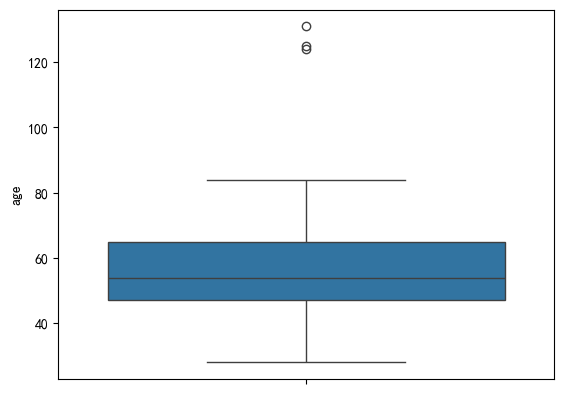

(2209, 35) 92.0


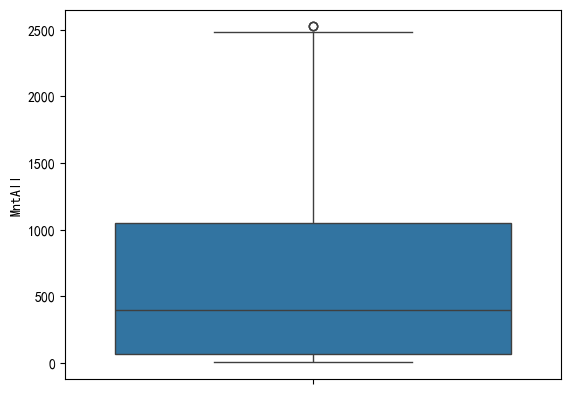

(2206, 35) 2514.0


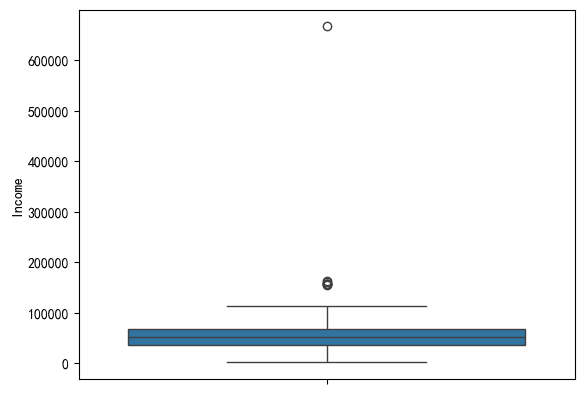

(2198, 35) 118320.375


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Education_num,Marital_Status_num,days_Customer,age,MntAll,Mntfood,Cmpcount,total_num,child
164,PhD,Married,157243.0,0,1,98,20,2,1582,1,...,0,4,4,3720,51,1608,1607,0,37,1
617,PhD,Together,162397.0,1,1,31,85,1,16,2,...,0,4,3,3991,48,107,105,0,1,2
655,Graduation,Divorced,153924.0,0,0,81,1,1,1,1,...,0,1,2,3742,49,6,5,0,0,0
687,PhD,Married,160803.0,0,0,21,55,16,1622,17,...,0,4,4,4294,42,1717,1713,0,44,0
1300,Master,Together,157733.0,1,0,37,39,1,9,2,...,0,3,3,3990,53,59,51,0,2,1
1653,Graduation,Together,157146.0,0,0,13,1,0,1725,2,...,0,1,3,4026,47,1730,1729,0,28,0
2132,PhD,Married,156924.0,0,0,85,2,1,2,1,...,0,4,4,3904,75,8,7,0,0,0
2233,Graduation,Together,666666.0,1,0,23,9,14,18,8,...,0,1,3,3992,47,62,50,0,11,1
10,Graduation,Married,NaN,1,0,11,5,5,6,0,...,0,1,4,3826,41,19,18,0,4,1
27,Graduation,Single,NaN,1,0,19,5,1,3,3,...,0,1,0,4094,38,637,275,0,27,1


In [76]:
# age异常值
seaborn.boxplot(df['age'])
plt.show()
plt.close()
# 异常值数量较少，选择直接剔除
q3, q1 = df['age'].quantile(0.75), df['age'].quantile(0.25)
iqr = q3 - q1
df = df[df['age'] < q3 + iqr * 1.5]
print(df.shape, q3 + iqr * 1.5)

# MntAll异常值
seaborn.boxplot(df['MntAll'])
plt.show()
plt.close()
# 异常值数量较少，选择直接剔除
q3, q1 = df['MntAll'].quantile(0.75), df['MntAll'].quantile(0.25)
iqr = q3 - q1
df = df[df['MntAll'] < q3 + iqr * 1.5]
print(df.shape, q3 + iqr * 1.5)

# Income异常值
seaborn.boxplot(df['Income'])
plt.show()
plt.close()
# 异常值数量较多，与缺失值合并待后续处理
q3, q1 = df['Income'].quantile(0.75), df['Income'].quantile(0.25)
iqr = q3 - q1
df_err = df[df['Income'] > q3 + iqr * 1.5]
df = df[df['Income'] < q3 + iqr * 1.5]
df_err = pd.concat([df_err, missing_values])
print(df.shape, q3 + iqr * 1.5)
df_err.head(10)

对Income异常数据作回归预测

In [77]:
# 相关性分析
corr_matrix = df.drop(columns=['Education', 'Marital_Status']).corr()  #去除文本数据
corr_Income = corr_matrix['Income']

# 选取高相关性属性用于回归
corr_Income_best = corr_Income[abs(corr_Income) > 0.5].drop('Income')
attr = corr_Income_best.index
print(corr_Income_best.sort_values())

# 选取训练集与测试集
train_x = df.loc[:1500][attr]
train_y = df.loc[:1500]['Income']

test_x = df.loc[1500:][attr]
test_y = df.loc[1500:]['Income']

# 贝叶斯岭回归
byr = BayesianRidge().fit(train_x, train_y)
print('score:', byr.score(test_x, test_y))  # 计算精度，模型总体可信

# 对异常数据重新预测收入
df_err['Income'] = np.array(byr.predict(df_err[attr]), dtype='int')

# 预测数据并入原数据框
df = pd.concat([df, df_err]).sort_index()
df.sort_index()
print(df.shape)
df_err.head(10)

NumWebVisitsMonth     -0.647059
Kidhome               -0.531071
NumWebPurchases        0.505191
MntFruits              0.534583
MntFishProducts        0.550640
MntSweetProducts       0.552931
NumStorePurchases      0.686486
MntMeatProducts        0.701468
total_num              0.701649
NumCatalogPurchases    0.709786
MntWines               0.729245
Mntfood                0.822752
MntAll                 0.823270
Name: Income, dtype: float64
score: 0.7645648439239072
(2230, 35)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Education_num,Marital_Status_num,days_Customer,age,MntAll,Mntfood,Cmpcount,total_num,child
164,PhD,Married,57997,0,1,98,20,2,1582,1,...,0,4,4,3720,51,1608,1607,0,37,1
617,PhD,Together,49009,1,1,31,85,1,16,2,...,0,4,3,3991,48,107,105,0,1,2
655,Graduation,Divorced,48237,0,0,81,1,1,1,1,...,0,1,2,3742,49,6,5,0,0,0
687,PhD,Married,60572,0,0,21,55,16,1622,17,...,0,4,4,4294,42,1717,1713,0,44,0
1300,Master,Together,49531,1,0,37,39,1,9,2,...,0,3,3,3990,53,59,51,0,2,1
1653,Graduation,Together,65259,0,0,13,1,0,1725,2,...,0,1,3,4026,47,1730,1729,0,28,0
2132,PhD,Married,48268,0,0,85,2,1,2,1,...,0,4,4,3904,75,8,7,0,0,0
2233,Graduation,Together,36645,1,0,23,9,14,18,8,...,0,1,3,3992,47,62,50,0,11,1
10,Graduation,Married,31156,1,0,11,5,5,6,0,...,0,1,4,3826,41,19,18,0,4,1
27,Graduation,Single,96004,1,0,19,5,1,3,3,...,0,1,0,4094,38,637,275,0,27,1


## **RFM模型**
对客户的价值进行分析

这里与后面的聚类不一样，我只选择了三种数据，以及以平均值作为阈值，将这份数据暂且作为保留

In [78]:
# 对用户按照三个维度进行分类，购买频率，购买花费，最后一次登录时间,以及用户收入水平
df['Income_Level'] = (((df['Income'] -df['Income'].min())/(df['Income'].max() - df['Income'].min()))*5)
df['Recency_Level'] = ((df['Recency'] -df['Recency'].min())/(df['Recency'].max() - df['Recency'].min()))*5
df['Mnt_Level'] = ((df['MntAll'] -df['MntAll'].min())/(df['MntAll'].max() - df['MntAll'].min()))*5
df['Frequency_Level'] = ((df['total_num'] -df['total_num'].min())/(df['total_num'].max() - df['total_num'].min()))*5 
# 三个都低于平均值则为流失用户
df['Value_Level'] = "流失用户"
# 三个维度都高于平均值则为市场重点用户
df['Value_Level'].loc[(df['Recency_Level'] <= df['Recency_Level'].mean()) & (df['Mnt_Level']
 >= df['Mnt_Level'].mean()) & (df['Frequency_Level'] >= df['Frequency_Level'].mean())]= '重点价值用户'

# 仅最后一次登录时间低于平均值，说明用户正在流失，需要挽回
df['Value_Level'].loc[(df['Recency_Level'] > df['Recency_Level'].mean()) & (df['Mnt_Level']
> df['Mnt_Level'].mean()) & (df['Frequency_Level'] > df['Frequency_Level'].mean())] = '重点召回用户'

# 仅购买频率低于平均值，说明该用户单次消费大，值得深入挖掘
df['Value_Level'].loc[(df['Recency_Level'] <= df['Recency_Level'].mean()) & (df['Mnt_Level']
> df['Mnt_Level'].mean()) & (df['Frequency_Level'] <= df['Frequency_Level'].mean())] = '重点深耕用户'

# 仅购买花费高于平均值，则该用户一次消费便足够高，是需要重点挽留的高消费用户
df['Value_Level'].loc[(df['Recency_Level'] > df['Recency_Level'].mean()) & (df['Mnt_Level']
 > df['Mnt_Level'].mean()) & (df['Frequency_Level'] <= df['Frequency_Level'].mean())] = '重点挽留用户'

# 仅购买花费低于平均值，说明用户虽然时常在线但消费金额低，则需要针对这部分用户深入挖掘，剖析其原因
df['Value_Level'].loc[(df['Recency_Level'] <= df['Recency_Level'].mean()) & (df['Mnt_Level']
 <= df['Mnt_Level'].mean()) & (df['Frequency_Level'] > df['Frequency_Level'].mean())] = '潜力用户'

# 仅最后一次登录时间高于平均值，说明是新用户
df['Value_Level'].loc[(df['Recency_Level'] <= df['Recency_Level'].mean()) & (df['Mnt_Level']
 <= df['Mnt_Level'].mean()) & (df['Frequency_Level'] <= df['Frequency_Level'].mean())] = '新用户'

# 仅购买频率高于平均值，说明是之前时常在线，现在却在流失，但价值不高，只需要做一般挽留措施
df['Value_Level'].loc[(df['Recency_Level'] > df['Recency_Level'].mean()) & (df['Mnt_Level']
 <= df['Mnt_Level'].mean()) & (df['Frequency_Level'] > df['Frequency_Level'].mean())] = '一般维持用户'

C:\Users\14648\AppData\Local\Temp\ipykernel_16000\1763796099.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Value_Level'].loc[(df['Recency_Level'] <= df['Recency_Level'].mean()) & (df['Mnt_Level']
C:\Users\14648\AppData\Local\Temp\i

In [92]:
df['reduct'] = df['NumDealsPurchases'] / df['total_num']
print(df[['total_num','MntAll','reduct']].loc[df['reduct'] > df['reduct'].quantile(0.99)])

      total_num  MntAll    reduct
9             2      49  0.500000
90           29     603  0.413793
148          16     211  0.437500
164          37    1608  0.405405
212          19     264  0.421053
383          16     211  0.437500
645          17     235  0.411765
724          12      71  0.416667
786          12      47  0.416667
955          12      53  0.416667
964          17     231  0.411765
1042         16     178  0.937500
1183         12      88  0.416667
1245         15       8  1.000000
1503         32     747  0.406250
1556         17     240  0.411765
1569         25    1019  0.440000
1588         17     221  0.411765
1596         12      47  0.416667
1788         29    1250  0.448276
1846         15       9  1.000000
2142         12      94  0.416667


## **描述性统计**
从年龄角度

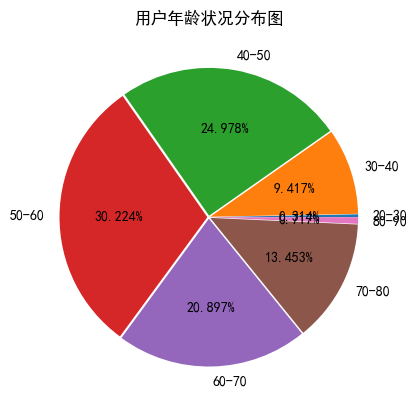

times
2      7
3    210
4    557
5    674
6    466
7    300
8     16
Name: timescount, dtype: int64
times
2    0.168573
3    0.169058
4    0.190235
5    0.197137
6    0.171092
7    0.157593
8    0.062445
Name: reduct, dtype: float64


<Axes: xlabel='times'>

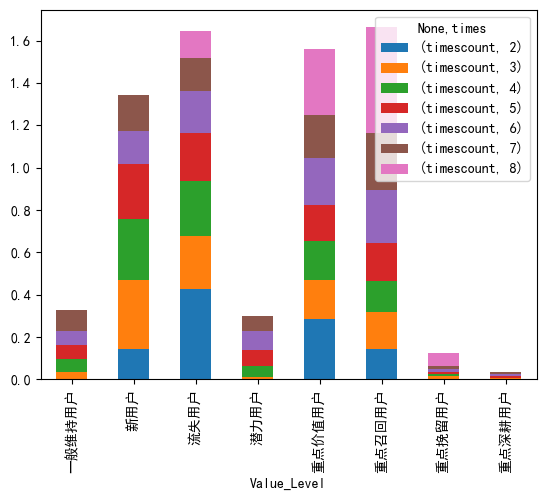

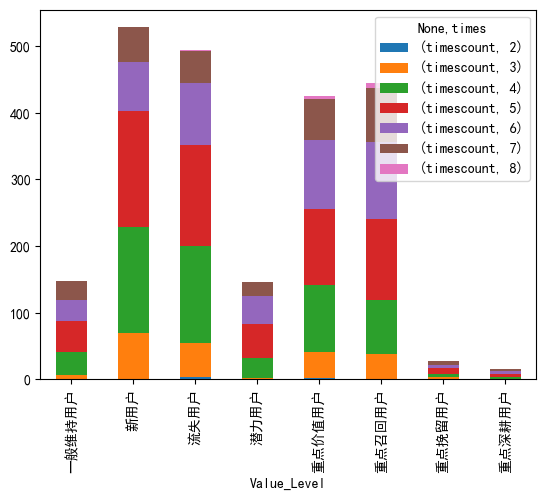

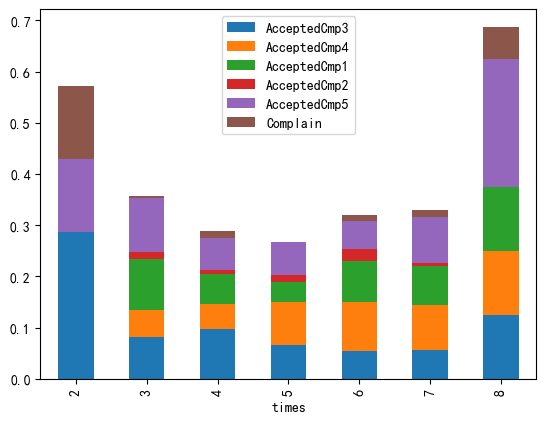

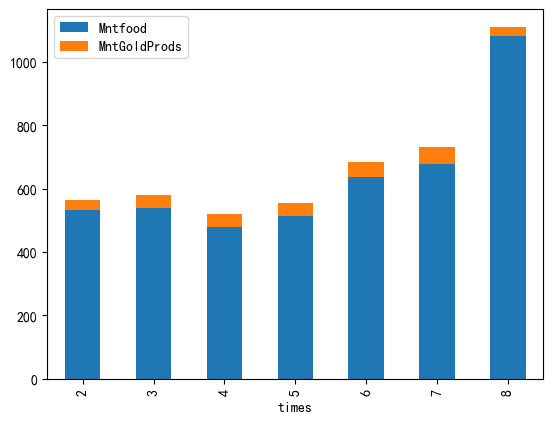

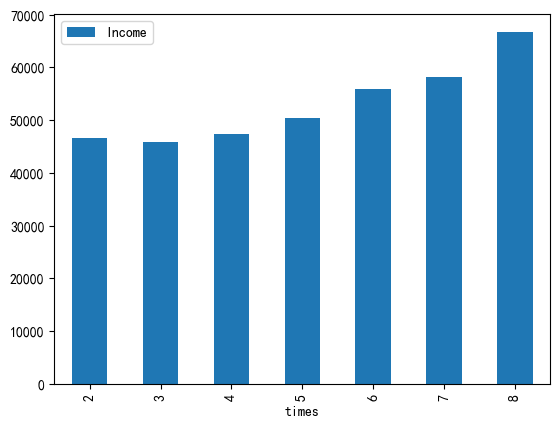

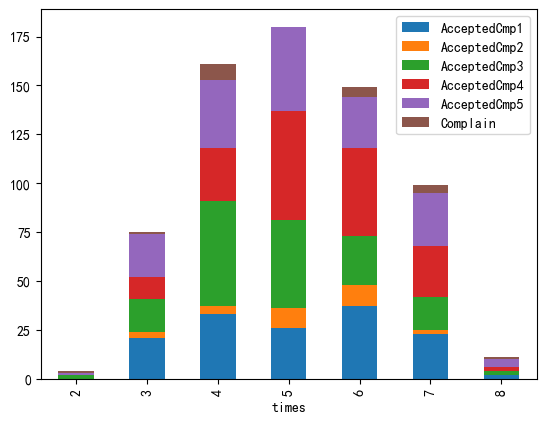

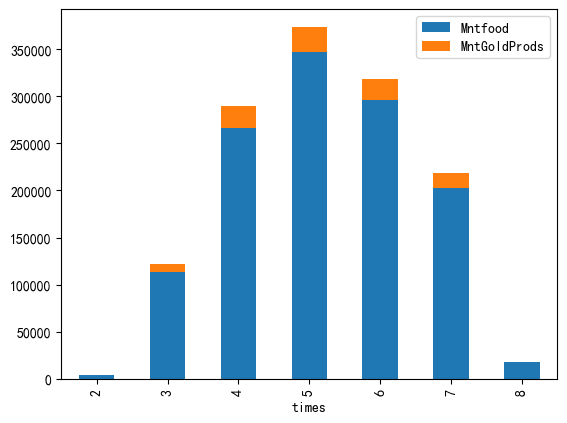

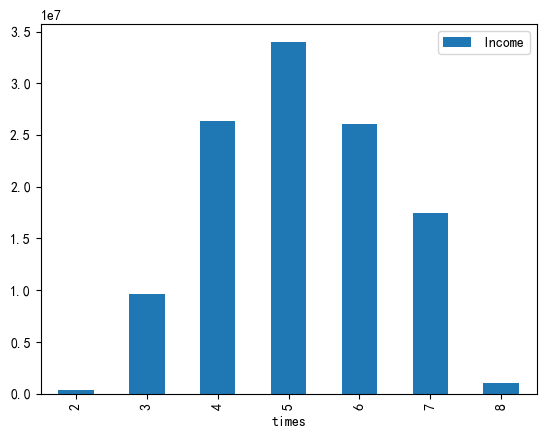

In [93]:
#  将年龄按十划分成不同的年龄段
df['times'] = df['age'] // 10
# 统计每个年龄段的人数
df['timescount'] = 1
d_times = df[[
    'times', 'MntGoldProds', 'MntAll', 'Mntfood', 'Income', 'timescount',
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmp5', 'Response', 'Complain','reduct'
]].groupby('times')

# 得到每个年龄段人均收入和支出水平
d_times_mean = d_times.mean()
# 得到每个年龄段总的收入和支出水平
d_times = d_times.sum()
# 得到每个年龄段人数
plt.pie(d_times['timescount'],
        explode=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
        labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'],
        autopct="%1.3f%%")
plt.title('用户年龄状况分布图')
plt.show()

#得到各种价值用户群体中不同年龄的比率情况，得到八十岁的老人群体广泛分布在重要群体中，说明八十岁老人群体是值得深入挖掘的群体
# 同时二三十岁的年轻人则不出所料地主要分布在流失群体中，但仍有部分有价值，所以需要深入区分这些年轻人的区别
# 占据总用户大多数的四五十岁的中年人主要分布在流失用户和新用户间，说明平台对主要用户的群体的粘性不足，需要注意
d_time_value = df[['times','timescount','Value_Level']].groupby(['Value_Level','times'])
d_time_value_sum = d_time_value.sum().unstack()
d_time_value_total = d_time_value_sum.sum(axis=0)
d_time_value_mean = d_time_value_sum / d_time_value_total
d_time_value_mean.plot(kind='bar',stacked=True)
d_time_value_sum.fillna(value=0,inplace=True)
d_time_value_sum.plot(kind='bar',stacked=True)
print(
    d_times['timescount']
)  # 第四，一，二个活动没有20-30岁年轻人参与，第五与第三个活动人均参与程度高，且第三个活动20-30岁年轻人是主力，第五个活动80-90岁老人人均参与度高
# 剩下的活动在除20-30以及80-90岁的群体中虽然总和够高，但人均参与度都不高，说明其并不受最广大的用户群体（40-50岁的中年人）的广泛欢迎
# 而从人均抱怨数量来讲，也是年轻人和老年人抱怨度最高，这也贴合了年轻人和老年稀少的事实，平台可以试着听取年轻人的意见在对当前的服务进行改进
d_times_mean[[
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmp5', 'Complain'
]].plot(kind='bar', stacked=True)
# d_times_mean[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp1','AcceptedCmp2','AcceptedCmp5','Response','Complain']].plot(kind='bar')
# 从人均角度来说，收入和支出都随着年龄增大而增大
print(d_times_mean['reduct'])
d_times_mean[['Mntfood', 'MntGoldProds']].plot(kind='bar', stacked=True)
d_times_mean[['Income']].plot(kind='bar')

# 虽然第三个活动和第五个活动的总和来讲并不高，但其在人均参与度来讲受到年轻人和老年人的喜爱，所以如果需要针对年轻用户和年老用户销售可以考虑三和五
d_times[[
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5', 'Complain'
]].plot(kind='bar', stacked=True)
# 曲线得到五十岁年龄段的总的支出和收入最高，且向两边递减
d_times[['Mntfood', 'MntGoldProds']].plot(kind='bar', stacked=True)
d_times[['Income']].plot(kind='bar')
# 说明该平台服务对象为四十到六十岁的用户

相关性热力图

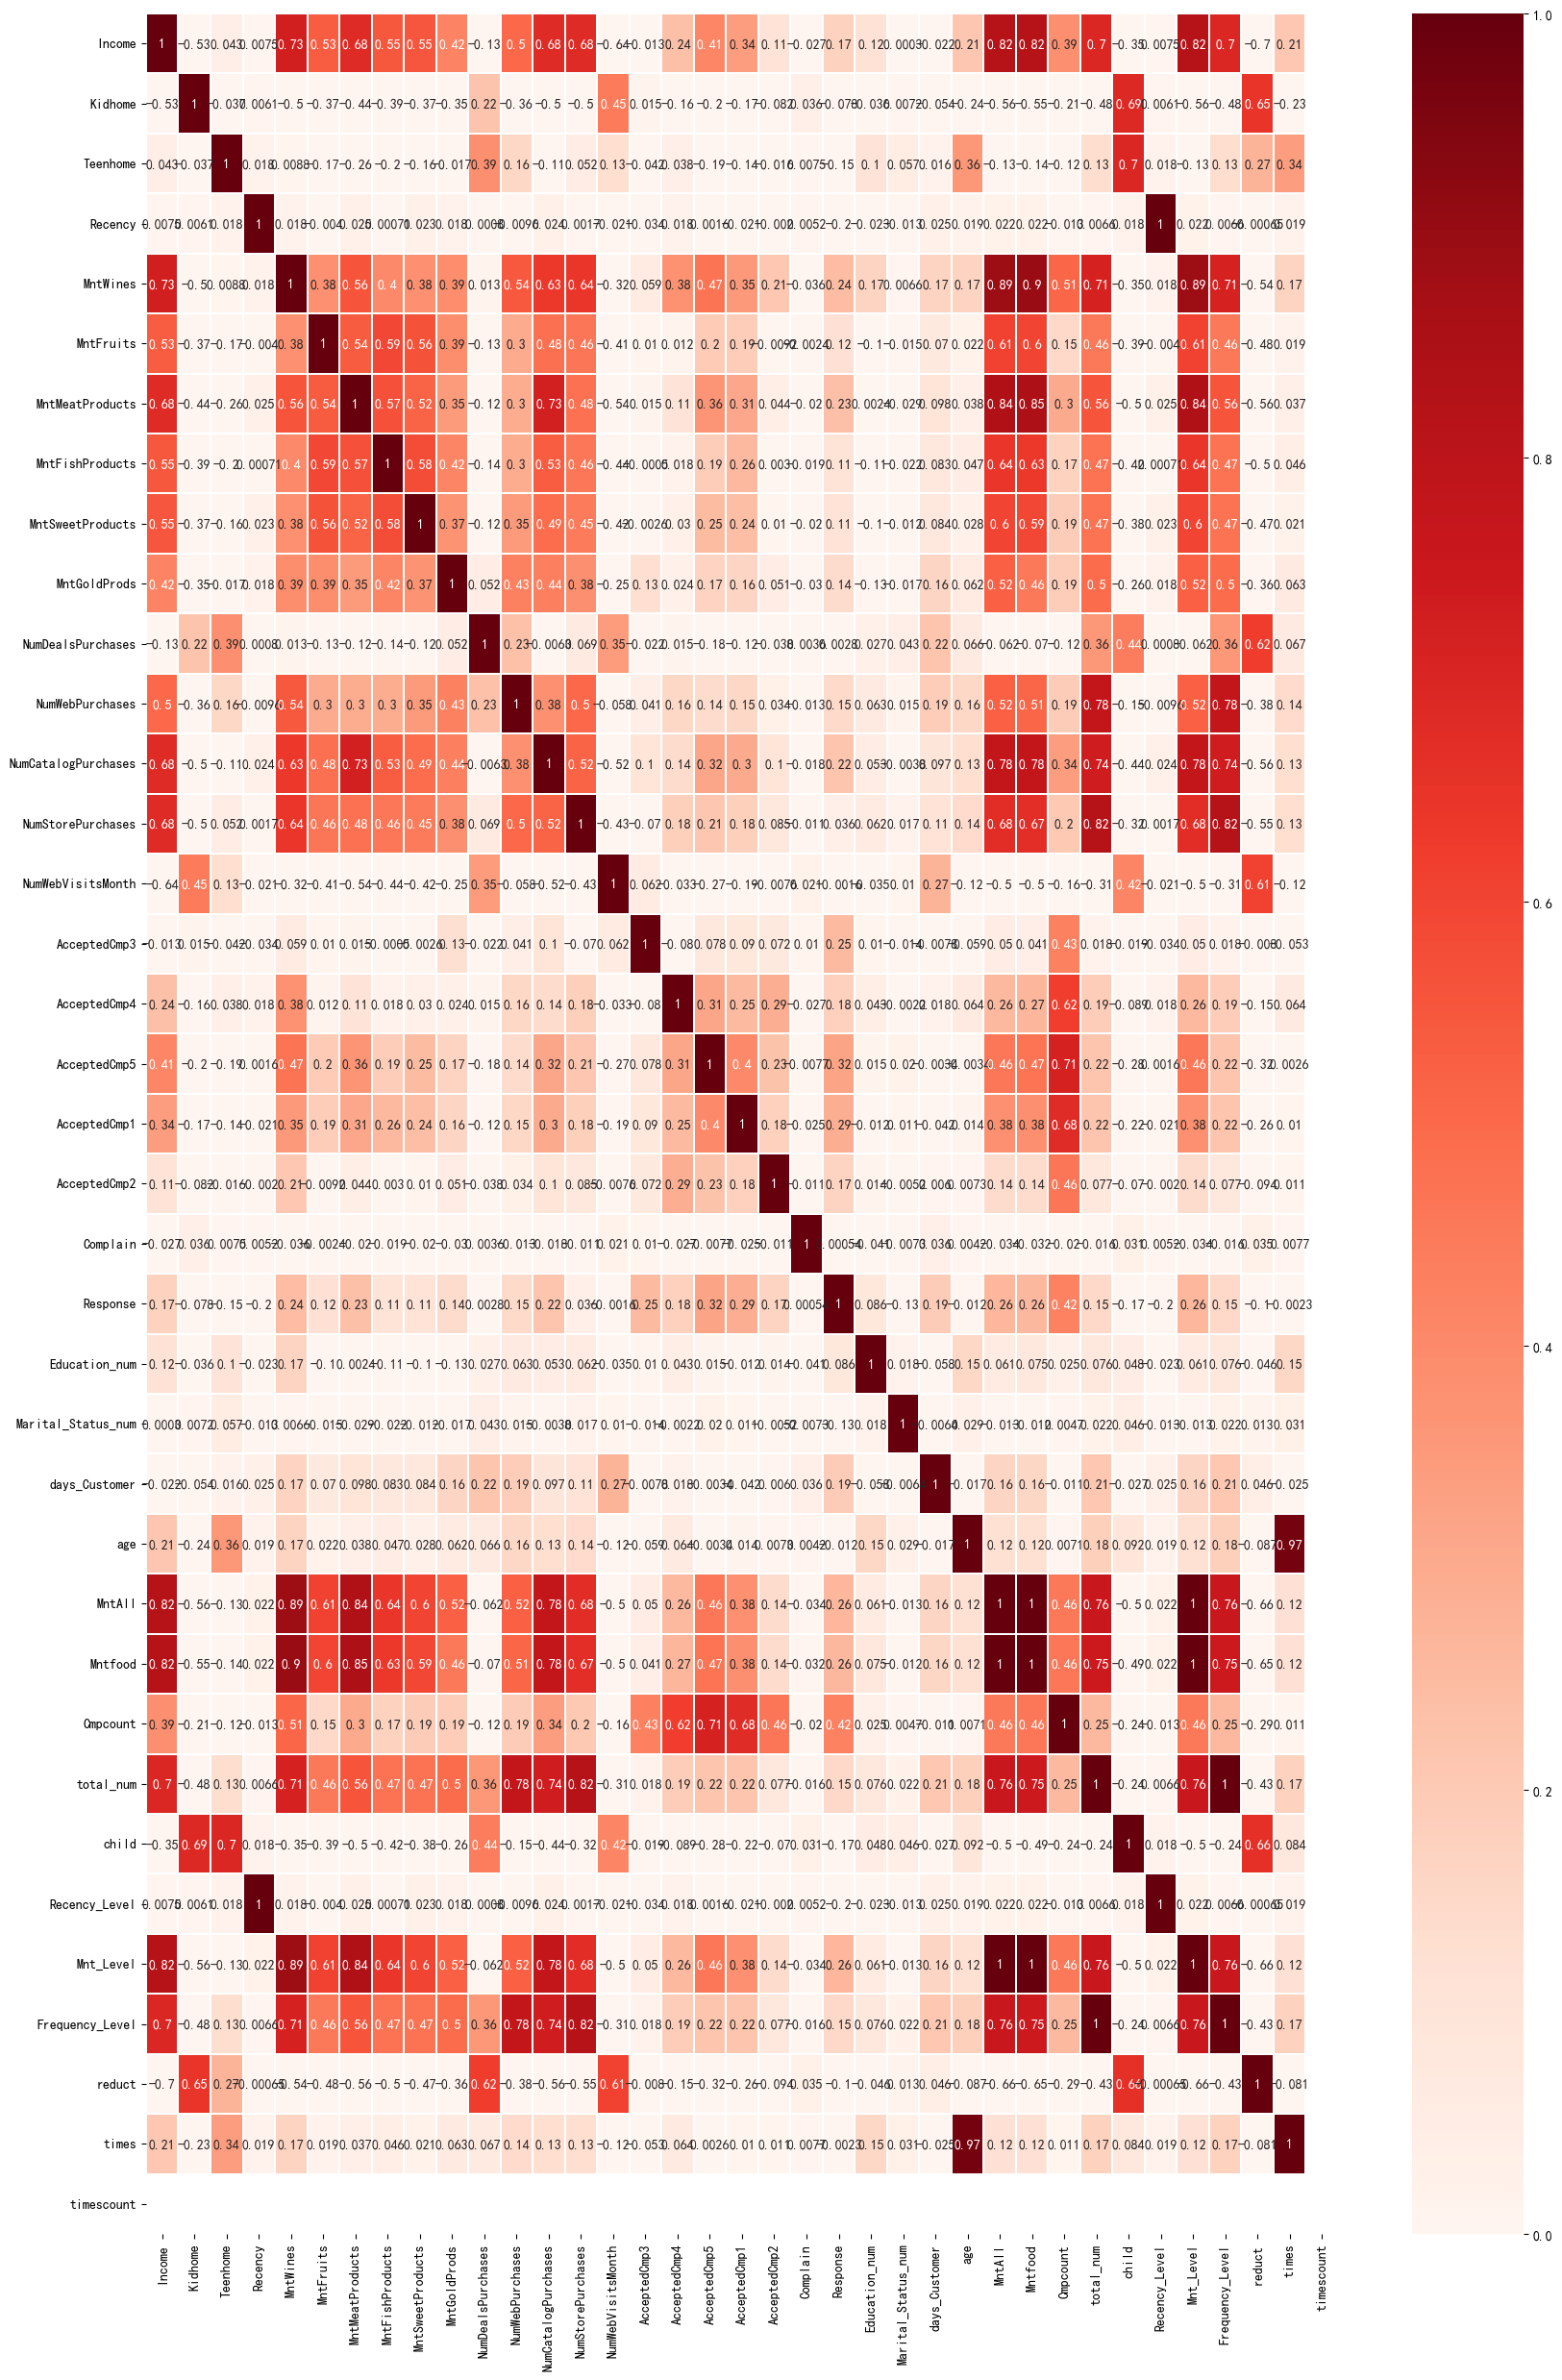

In [81]:
corr_matrix = df.drop(columns=['Education', 'Marital_Status','Z_CostContact','Z_Revenue','Value_Level']).corr()
plt.figure(figsize=[20, 30])
seaborn.heatmap(corr_matrix, vmin=0, vmax=1, cmap="Reds", linewidths=0.1, annot=True)
plt.show()

用户家庭孩子数量状况分析

child
0     632
1    1124
2     421
3      53
Name: timescount, dtype: int64


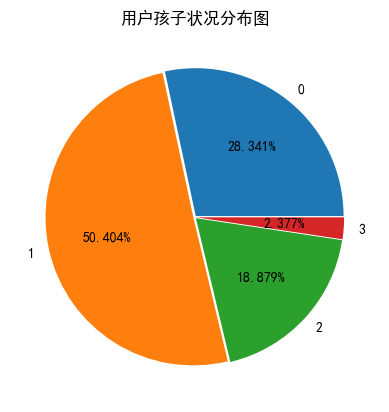

child
0    0.080340
1    0.189953
2    0.291905
3    0.302541
Name: reduct, dtype: float64


<Axes: xlabel='child'>

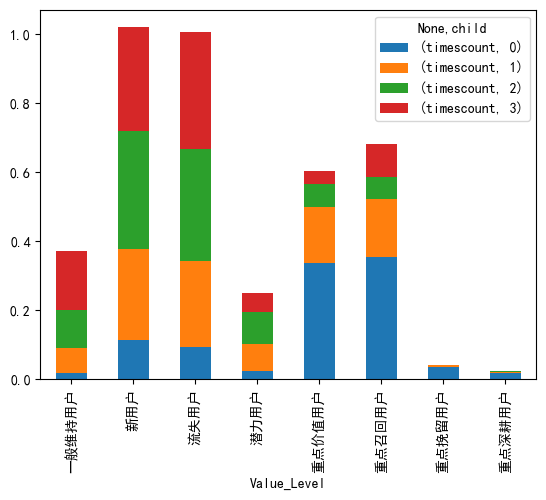

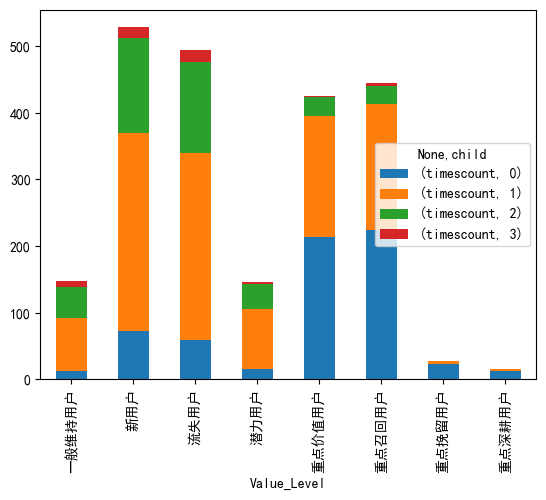

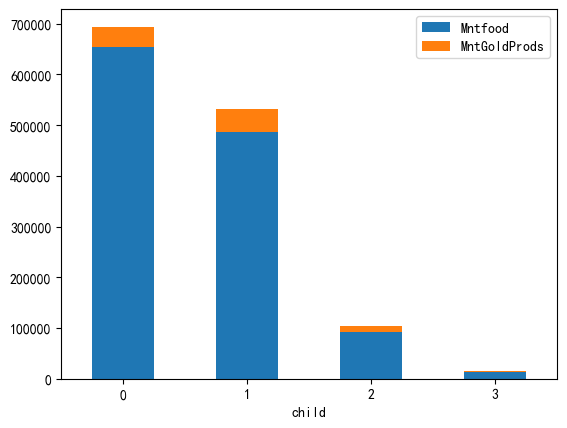

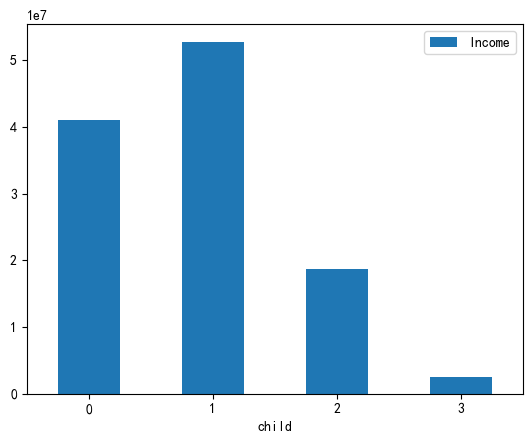

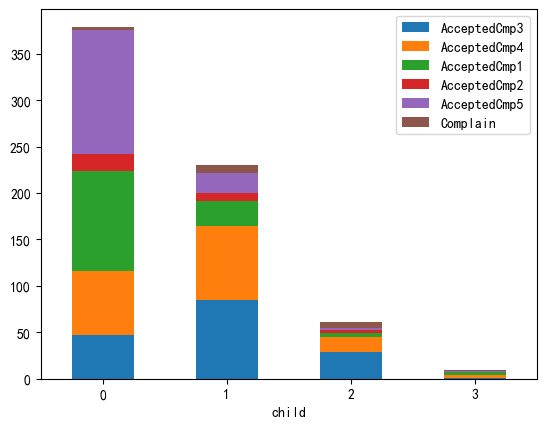

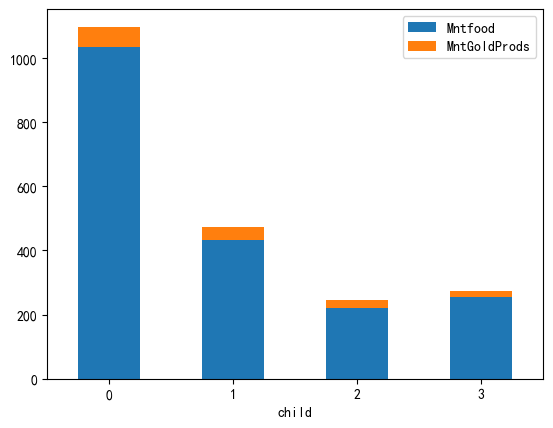

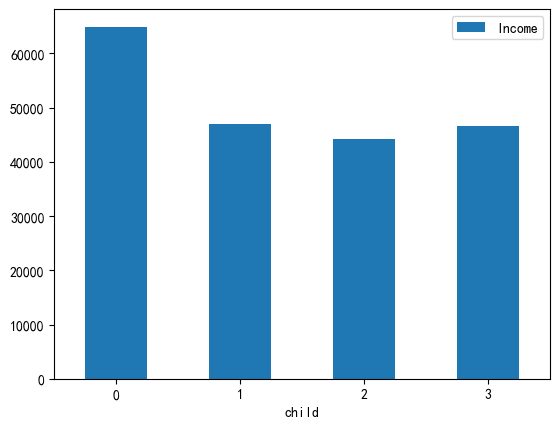

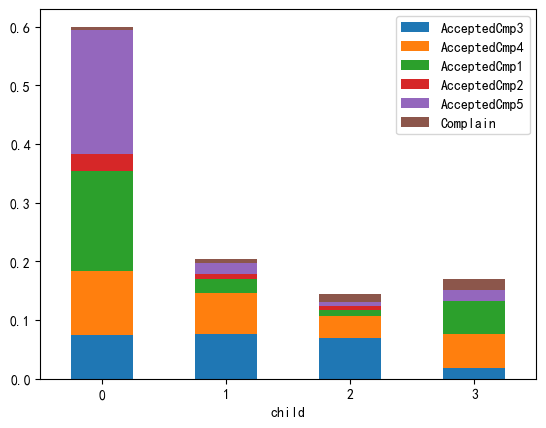

In [105]:
d_child = df[[
    'child', 'MntGoldProds', 'Mntfood', 'MntAll', 'Income', 'timescount',
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmp5', 'Response', 'Complain','reduct'
]].groupby('child')

d_child_sum = d_child.sum()
d_child_mean = d_child.mean()
# 得到主要服务对象为本科级以上的人员
print(d_child_sum['timescount'])
# 总的来看本科人员人最多，收入和支出水平最高
plt.pie(d_child_sum['timescount'],
        explode=[0.01, 0.01, 0.01, 0.01],
        labels=[0,1,2,3],
        autopct="%1.3f%%")
plt.title('用户孩子数量状况分布图')
plt.show()
print(d_child_mean['reduct'])

# 得到不同价值用户群体在不同孩子数量间的分布情况
d_child_value = df[['child','timescount','Value_Level']].groupby(['Value_Level','child'])
d_child_value_sum = d_child_value.sum().unstack()
d_child_value_total = d_child_value_sum.sum(axis=0)
d_child_value_mean = d_child_value_sum / d_child_value_total
d_child_value_mean.plot(kind='bar',stacked=True)
d_child_value_sum.fillna(value=0,inplace=True)
d_child_value_sum.plot(kind='bar',stacked=True)
# 对比发现，没有孩子的用户主要为重点用户
# 孩子越多，用户价值比率就越低

d_child_sum[['Mntfood', 'MntGoldProds']].plot(kind='bar', stacked=True, rot=0)
d_child_sum[['Income']].plot(kind='bar', rot=0)
# 平均而言，没有孩子的人收入和支出最高，且孩子越多，支出就越少
# d_edu_sum[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp1','AcceptedCmp2','AcceptedCmp5','Response','Complain']].plot(kind='bar')

d_child_sum[[
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmp5', 'Complain'
]].plot(kind='bar', stacked=True, rot=0)
# 没有孩子的人活动参与度越高

d_child_mean[['Mntfood', 'MntGoldProds']].plot(kind='bar', stacked=True, rot=0)
d_child_mean[['Income']].plot(kind='bar', rot=0)
# 该平台主要负责对象是0-1个孩子群体
# d_edu_mean[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp1','AcceptedCmp2','AcceptedCmp5','Response','Complain']].plot(kind='bar')
d_child_mean[[
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmp5', 'Complain'
]].plot(kind='bar', stacked=True, rot=0)

用户婚姻状况分析

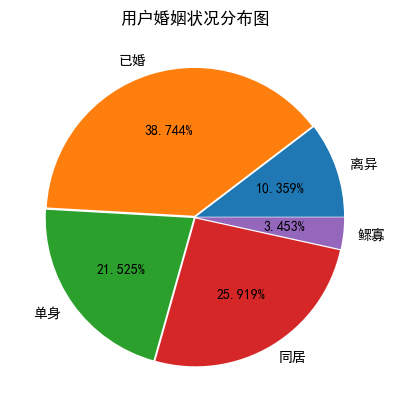

Marital_Status
Divorced    0.185906
Married     0.182445
Single      0.179808
Together    0.180259
Widow       0.161527
Name: reduct, dtype: float64


<Axes: xlabel='Marital_Status'>

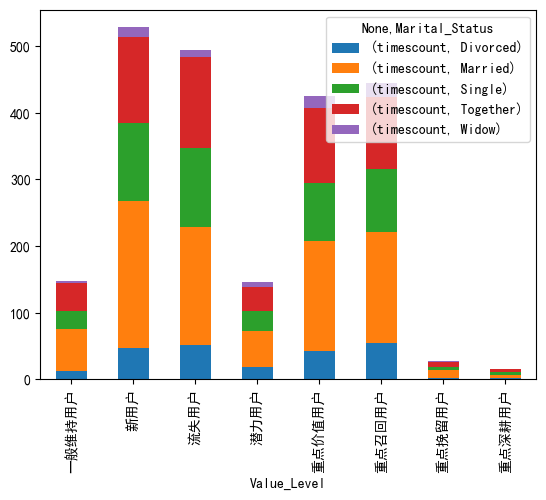

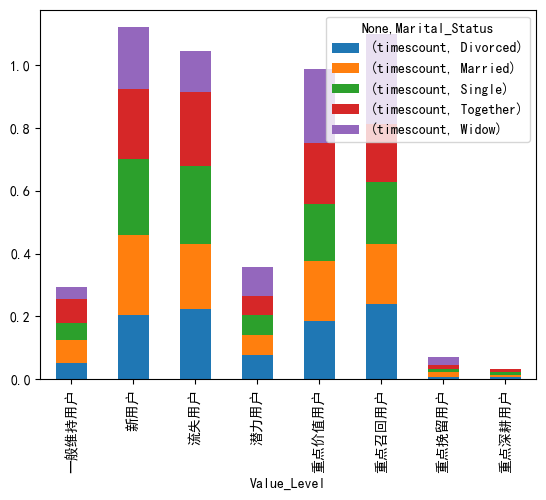

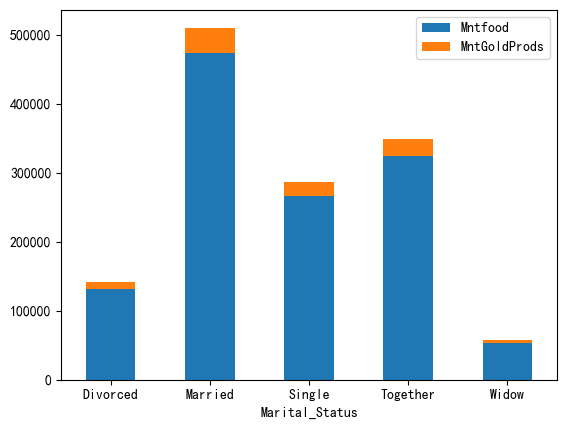

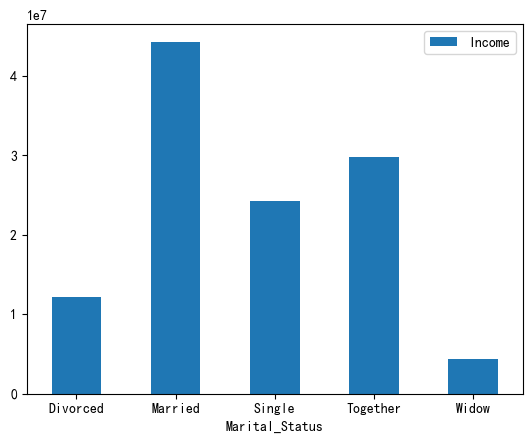

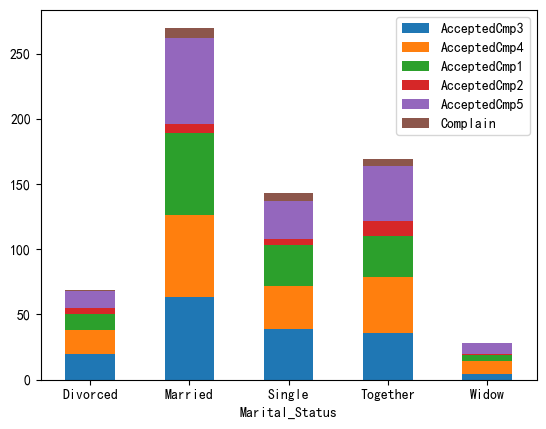

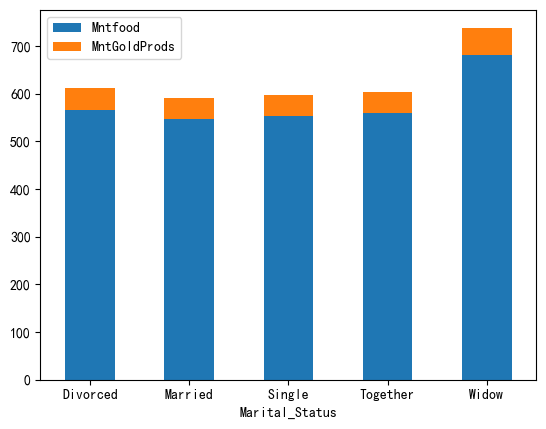

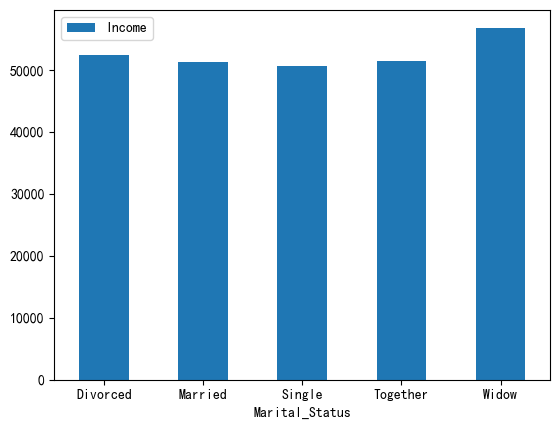

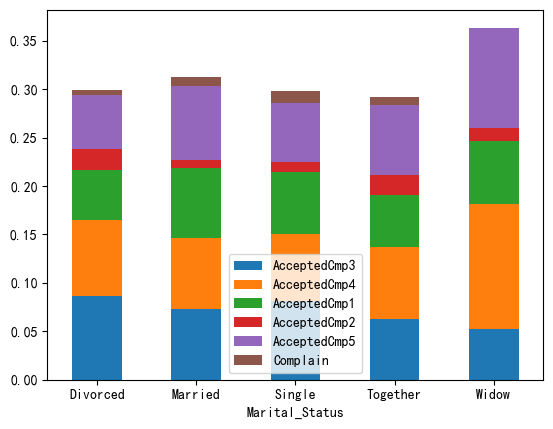

In [96]:
d_mar = df[[
    'Marital_Status', 'Mntfood', 'MntAll', 'MntGoldProds', 'Income',
    'timescount', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1',
    'AcceptedCmp2', 'AcceptedCmp5', 'Response', 'Complain','reduct'
]].groupby('Marital_Status')
d_mar_sum = d_mar.sum()
d_mar_mean = d_mar.mean()
d_pie = [list(i) for i in zip(d_mar_sum.index, d_mar_sum['timescount'])]

plt.pie(d_mar_sum['timescount'],
        explode=[0.01, 0.01, 0.01, 0.01, 0.01],
        labels=[
            '离异',
            '已婚',
            '单身',
            '同居',
            '鳏寡',
        ],
        autopct="%1.3f%%")
plt.title('用户婚姻状况分布图')
plt.show()

#得到不同价值群体中婚姻状况的分布
d_mar_value = df[['Marital_Status','timescount','Value_Level']].groupby(['Value_Level','Marital_Status'])
d_mar_value_sum = d_mar_value.sum().unstack()
d_mar_value_total = d_mar_value_sum.sum(axis=0)
d_mar_value_sum.fillna(value=0,inplace=True)
d_mar_value_mean = d_mar_value_sum / d_mar_value_total
d_mar_value_sum.plot(kind='bar',stacked=True)
d_mar_value_mean.plot(kind='bar',stacked=True)
# 最终可以发现不同价值群体的婚姻状况呈均匀分布，而且不同的婚姻群体在每一价值群体间也是均匀分布，说明婚姻状况与价值取向关联性不高

print(d_mar_mean['reduct'])
# 从总和来看已婚用户占比最多，消费也最高，但从人均角度来看，婚姻状况并不影响用户人均消费
d_mar_sum[['Mntfood', 'MntGoldProds']].plot(kind='bar', stacked=True, rot=0)
d_mar_sum[['Income']].plot(kind='bar', rot=0)
# 各个活动在不同婚姻状况间呈平均分布，说明婚姻状况和活动参与积极度无关
# d_mar_sum[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp1','AcceptedCmp2','AcceptedCmp5','Response','Complain']].plot(kind='bar')
d_mar_sum[[
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmp5', 'Complain'
]].plot(kind='bar', stacked=True, rot=0)
d_mar_mean[['Mntfood', 'MntGoldProds']].plot(kind='bar', stacked=True, rot=0)
d_mar_mean[['Income']].plot(kind='bar', rot=0)
# d_mar_mean[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp1','AcceptedCmp2','AcceptedCmp5','Response','Complain']].plot(kind='bar')
d_mar_mean[[
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmp5', 'Complain'
]].plot(kind='bar', stacked=True, rot=0)


对数据进行熵权法

In [84]:
data = df.drop(columns=['Education', 'Marital_Status','Z_CostContact','Z_Revenue','timescount',
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp5', 'Response', 'Complain']).set_index('Value_Level')
for i in list(data.columns):
    Max = np.max(data[i])
    Min = np.min(data[i])
    if (i == 'Recency'):
        data[i] = (Max - data[i])/(Max - Min)
    else:
        data[i] = (data[i] - Min)/(Max - Min)
def bizhong(df_bizhong):
    for column in df_bizhong.columns:
        sigma = sum(df_bizhong[column])
        df_bizhong[column] = df_bizhong[column].apply(lambda x: x/sigma if x/sigma != 0 else 10**-6)
    return df_bizhong
df_bizhong = bizhong(data)

k = 1 / np.log(2230)
h_j = (-k) * np.array([sum([pij*np.log(pij) for pij in df_bizhong[column]]) for column in df_bizhong.columns])
h_js = pd.Series(h_j,index=df_bizhong.columns,name='指标的熵值')
df_bianyi = pd.Series(1-h_j,index=df_bizhong.columns,name='差异系数')
df_bianyi

Income                 0.012008
Kidhome                0.111187
Teenhome               0.094262
Recency                0.025376
MntWines               0.077356
MntFruits              0.112403
MntMeatProducts        0.093781
MntFishProducts        0.108261
MntSweetProducts       0.113888
MntGoldProds           0.073734
NumDealsPurchases      0.035291
NumWebPurchases        0.028988
NumCatalogPurchases    0.073832
NumStorePurchases      0.019929
NumWebVisitsMonth      0.014942
Education_num          0.025636
Marital_Status_num     0.035607
days_Customer          0.024553
age                    0.012909
MntAll                 0.066609
Mntfood                0.070179
Cmpcount               0.217214
total_num              0.018228
child                  0.051409
Recency_Level          0.026355
Mnt_Level              0.066609
Frequency_Level        0.018228
reduct                      NaN
times                  0.010843
Name: 差异系数, dtype: float64

In [85]:
df['if_child'] = 1
df['if_child'].loc[df['child'] < 1] = 0
d_time_value_child = df[['times','MntAll','if_child']].groupby(['times','if_child'])
d_times_child_sum = d_time_value_child.mean().unstack()
print(d_times_child_sum)
# d_times_child_sum.fillna(value=0,inplace=True)
# d_times_child_sum['sum'] = d_times_child_sum.apply(lambda x:x.sum(),axis=1)
# namelist = d_times_child_sum.columns
# print(d_times_child_sum.loc[0:2,namelist[0]])
# for i in range(d_times_child_sum.shape[1]):
#     for l in range(d_times_child_sum.shape[0]):
#         d_times_child_sum.loc[i,namelist[l]] = d_times_child_sum.loc[i,namelist[l]] / d_times_child_sum.loc[i,'sum']    
# # sums = d_times_child_sum.loc[:,'sum']
# # d_times_child_sum = pd.concat([d_times_child_sum[['重点召回用户','重点价值用户','重点深耕用户','重点挽留用户','潜力用户','新用户','一般维持用户','流失用户']].apply(lambda x:x/d_times_child_sum['sum']),d_times_child_sum['sum']],axis=1)

# d_times_child_sum.plot(kind='bar',stacked=True)

               MntAll            
if_child            0           1
times                            
2          563.428571         NaN
3          979.524272  196.233645
4         1171.637795  327.018605
5         1173.674242  404.031365
6         1072.090226  527.651652
7         1095.771930  505.903226
8         1110.687500         NaN


C:\Users\14648\AppData\Local\Temp\ipykernel_16000\3674465631.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['if_child'].loc[df['child'] < 1] = 0
C:\Users\14648\AppData\Local\Temp\ipykernel_16000\3674465631.py:2: SettingWithCopyWarnin

对同一年龄层的人以是否有孩子做区分，得到在同一年龄层中，没有孩子的用户群体出现重点用户的比率高于有孩子的用户群体，这或许是因为主要销售酒导致的

In [86]:
df['if_act'] = 1
df['if_act'].loc[df['Cmpcount'] < 1] = 0
d_edu_value_cmp = df[['times','timescount','Value_Level','if_act']].groupby(['times','if_act','Value_Level'])
d_edu_cmp_sum = d_edu_value_cmp.sum().unstack()
d_edu_cmp_sum.fillna(value=0,inplace=True)
d_edu_cmp_sum['sum'] = d_edu_cmp_sum.apply(lambda x:x.sum(),axis=1)
print(d_edu_cmp_sum)

             timescount                                                    sum
Value_Level      一般维持用户    新用户   流失用户  潜力用户 重点价值用户 重点召回用户 重点挽留用户 重点深耕用户       
times if_act                                                                  
2     0             0.0    1.0    2.0   0.0    2.0    0.0    0.0    0.0    5.0
      1             0.0    0.0    1.0   0.0    0.0    1.0    0.0    0.0    2.0
3     0             7.0   61.0   51.0   2.0   20.0   26.0    0.0    0.0  167.0
      1             0.0    8.0    1.0   0.0   19.0   11.0    3.0    1.0   43.0
4     0            31.0  145.0  131.0  26.0   62.0   55.0    1.0    2.0  453.0
      1             3.0   14.0   14.0   4.0   39.0   26.0    4.0    0.0  104.0
5     0            40.0  153.0  146.0  40.0   71.0   86.0    5.0    4.0  545.0
      1             7.0   21.0    6.0  11.0   43.0   36.0    4.0    1.0  129.0
6     0            19.0   69.0   84.0  36.0   71.0   74.0    3.0    4.0  360.0
      1            12.0    4.0    8.0   6.0   32.0  

C:\Users\14648\AppData\Local\Temp\ipykernel_16000\826376168.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['if_act'].loc[df['Cmpcount'] < 1] = 0
C:\Users\14648\AppData\Local\Temp\ipykernel_16000\826376168.py:2: SettingWithCopyWarning

In [87]:
df['if_child'] = 1
df['if_child'].loc[df['child'] < 1] = 0
d_time_value_child = df[['Education_num','timescount','Value_Level','if_child']].groupby(['Education_num','if_child','Value_Level'])
d_times_child_sum = d_time_value_child.sum().unstack()
d_times_child_sum.fillna(value=0,inplace=True)
d_times_child_sum['sum'] = d_times_child_sum.apply(lambda x:x.sum(),axis=1)
print(d_times_child_sum)


                       timescount                                           \
Value_Level                一般维持用户    新用户   流失用户  潜力用户 重点价值用户 重点召回用户 重点挽留用户   
Education_num if_child                                                       
0             0               0.0    8.0    8.0   0.0    0.0    1.0    0.0   
              1               0.0   21.0   16.0   0.0    0.0    0.0    0.0   
1             0               4.0   36.0   30.0   3.0  111.0  117.0   12.0   
              1              58.0  210.0  228.0  76.0  110.0  118.0    4.0   
2             0               1.0   13.0    6.0   3.0   23.0   17.0    1.0   
              1               8.0   42.0   49.0   7.0   17.0   13.0    0.0   
3             0               5.0    9.0    9.0   1.0   35.0   30.0    6.0   
              1              32.0   81.0   68.0  19.0   36.0   32.0    0.0   
4             0               2.0    7.0    6.0   8.0   45.0   59.0    4.0   
              1              38.0  101.0   74.0  29.0   48.0   5

C:\Users\14648\AppData\Local\Temp\ipykernel_16000\2359278155.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['if_child'].loc[df['child'] < 1] = 0
C:\Users\14648\AppData\Local\Temp\ipykernel_16000\2359278155.py:2: SettingWithCopyWarnin

In [88]:
d_edu_value_cmp = df[['Education_num','timescount','Value_Level','Cmpcount']].groupby(['Education_num','Cmpcount','Value_Level'])
d_edu_cmp_sum = d_edu_value_cmp.sum().unstack()
d_edu_cmp_sum.fillna(value=0,inplace=True)
d_edu_cmp_sum['sum'] = d_edu_cmp_sum.apply(lambda x:x.sum(),axis=1)
print(d_edu_cmp_sum)

                       timescount                                           \
Value_Level                一般维持用户    新用户   流失用户  潜力用户 重点价值用户 重点召回用户 重点挽留用户   
Education_num Cmpcount                                                       
0             0               0.0   26.0   21.0   0.0    0.0    1.0    0.0   
              1               0.0    3.0    3.0   0.0    0.0    0.0    0.0   
1             0              51.0  227.0  239.0  64.0  143.0  157.0    9.0   
              1              11.0   19.0   19.0  13.0   48.0   45.0    4.0   
              2               0.0    0.0    0.0   2.0   14.0   17.0    3.0   
              3               0.0    0.0    0.0   0.0   11.0   13.0    0.0   
              4               0.0    0.0    0.0   0.0    5.0    3.0    0.0   
2             0               8.0   51.0   54.0   9.0   21.0   20.0    0.0   
              1               1.0    4.0    1.0   1.0   12.0    7.0    1.0   
              2               0.0    0.0    0.0   0.0    5.0    

从消费角度

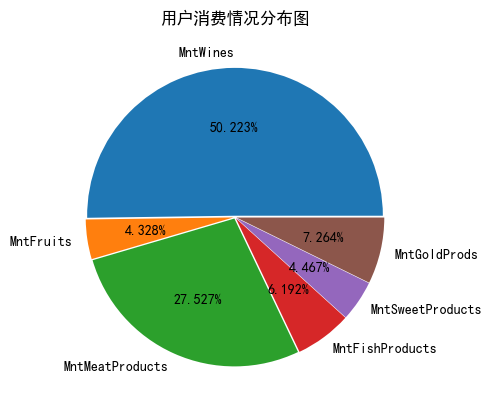

In [90]:
data1 = df[df.columns[6:12]].mean(axis=0)
plt.pie(data1,
         explode=[0.01,0.01, 0.01, 0.01, 0.01, 0.01],
         labels=
             df.columns[6:12],
         autopct="%1.3f%%")
plt.title('用户消费情况分布图')
plt.show()


从收入水平角度

0       3.0
1       2.0
2       4.0
3       2.0
4       3.0
       ... 
2235    3.0
2236    3.0
2237    3.0
2238    4.0
2239    3.0
Name: Income_Level, Length: 2230, dtype: float64
              Mntfood  MntAll  MntGoldProds      Income  timescount  \
Income_Level                                                          
1.0             11637   15708          4071   3941692.0         222   
2.0             88767  103942         15175  26782892.0         745   
3.0            457488  496427         38939  42112050.0         728   
4.0            637328  674425         37097  39013680.0         503   
5.0             51380   53739          2359   3069566.0          32   

              AcceptedCmp3  AcceptedCmp4  AcceptedCmp1  AcceptedCmp2  \
Income_Level                                                           
1.0                     17             0             0             0   
2.0                     61            12             2             2   
3.0                     42       

C:\Users\14648\AppData\Local\Temp\ipykernel_16000\2592693491.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Income_Level'].loc[df['Income_Level'] == 6] = 5
C:\Users\14648\AppData\Local\Temp\ipykernel_16000\2592693491.py:2: SettingWi

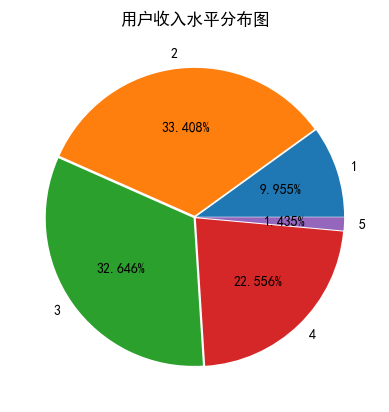

Income_Level
1.0    0.277865
2.0    0.249749
3.0    0.165359
4.0    0.069043
5.0    0.025148
Name: reduct, dtype: float64


<Axes: xlabel='Income_Level'>

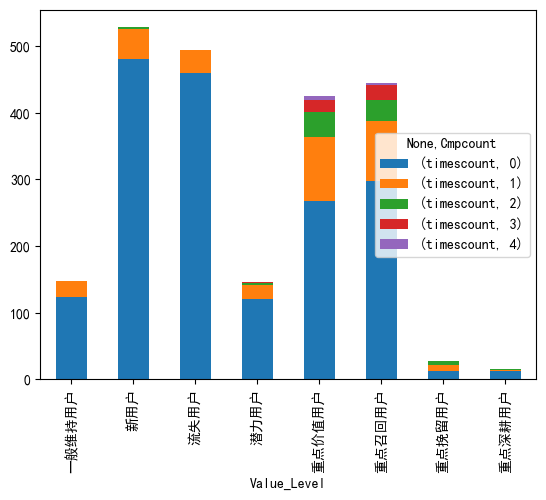

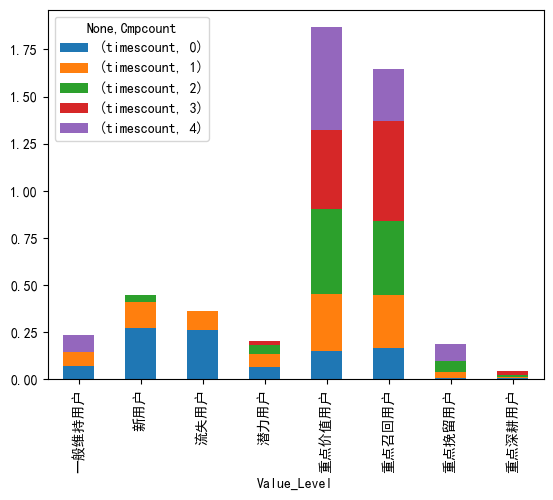

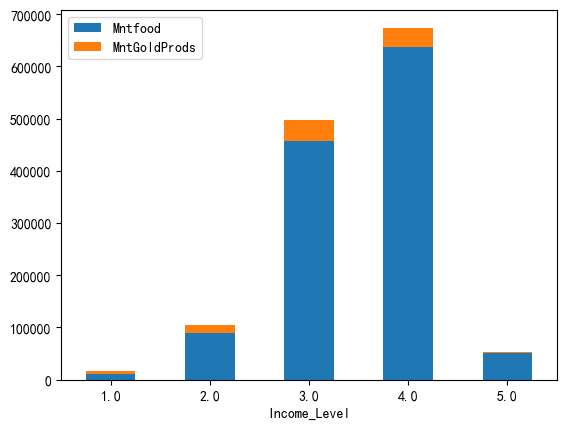

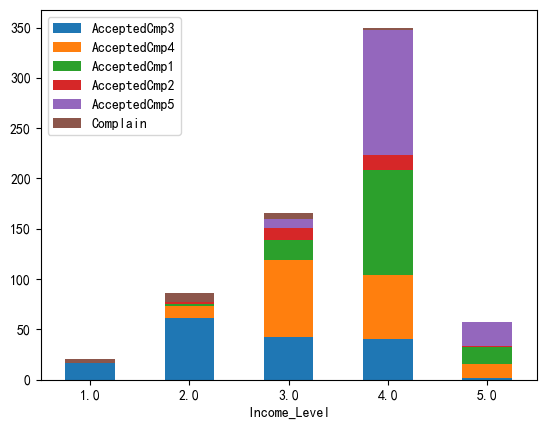

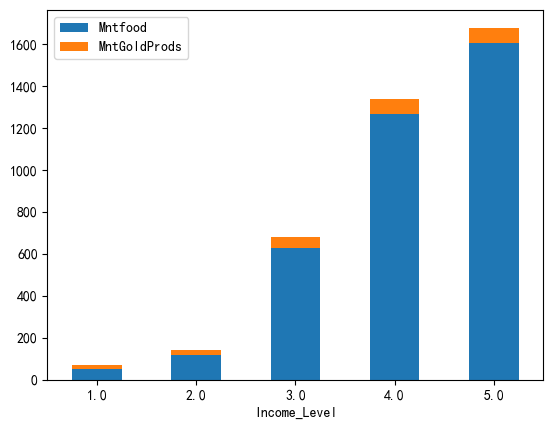

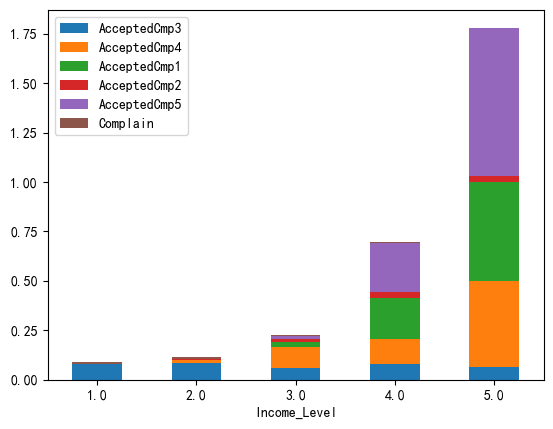

In [103]:
df['Income_Level'] = ((((df['Income'] -df['Income'].min())/(df['Income'].max() - df['Income'].min()))*5) // 1) + 1
df['Income_Level'].loc[df['Income_Level'] == 6] = 5
d_Inc = df[[
    'Income_Level', 'Mntfood', 'MntAll', 'MntGoldProds', 'Income',
    'timescount', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1',
    'AcceptedCmp2', 'AcceptedCmp5', 'Response', 'Complain','reduct'
]].groupby('Income_Level')
d_Inc_sum = d_Inc.sum()
d_Inc_mean = d_Inc.mean()
plt.pie(d_Inc_sum['timescount'],
        explode=[0.01, 0.01, 0.01, 0.01, 0.01],
        labels=[
            '1',
            '2',
            '3',
            '4',
            '5'
        ],
        autopct="%1.3f%%")
plt.title('用户收入水平分布图')
plt.show()
# 不同收入人群使用折扣的平均使用率，得到收入越高，使用率越低
print(d_Inc_mean['reduct'])
#得到不同价值群体中收入的分布
d_Inc_value = df[['Income_Level','timescount','Value_Level']].groupby(['Value_Level','Income_Level'])
d_Inc_value_sum = d_mar_value.sum().unstack()
d_Inc_value_total = d_mar_value_sum.sum(axis=0)
d_Inc_value_sum.fillna(value=0,inplace=True)
d_Inc_value_mean = d_Inc_value_sum / d_Inc_value_total
d_Inc_value_sum.plot(kind='bar',stacked=True)
d_Inc_value_mean.plot(kind='bar',stacked=True)
# 最终可以发现不同价值群体的收入水平呈正态分布，符合一般性规律

# 从总和来看随着用户收入水平提高，消费越高，但在等级为五时猛跌，这是因为等级为五的群体占比不多
# 但从人均角度来看，随着用户收入水平提高，消费越高。
d_Inc_sum[['Mntfood', 'MntGoldProds']].plot(kind='bar', stacked=True, rot=0)

# 从平均角度来看，用户收入水平越高，参加活动数越多
# 且高收入用户在活动四，一，五参与的平均次数最高，对高收入人群来说，活动一，四，五吸引力度最大
# d_mar_sum[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp1','AcceptedCmp2','AcceptedCmp5','Response','Complain']].plot(kind='bar')
d_Inc_sum[[
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmp5', 'Complain'
]].plot(kind='bar', stacked=True, rot=0)
d_Inc_mean[['Mntfood', 'MntGoldProds']].plot(kind='bar', stacked=True, rot=0)

# d_mar_mean[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp1','AcceptedCmp2','AcceptedCmp5','Response','Complain']].plot(kind='bar')
d_Inc_mean[[
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmp5', 'Complain'
]].plot(kind='bar', stacked=True, rot=0)

从参与活动角度

4


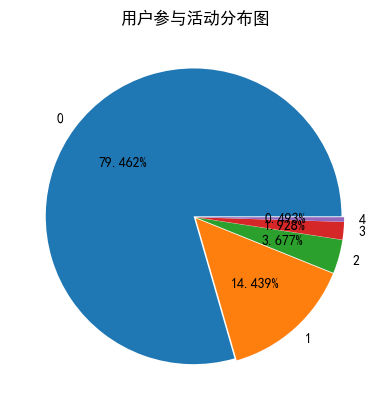

Cmpcount
0    0.195509
1    0.146566
2    0.086250
3    0.057345
4    0.034963
Name: reduct, dtype: float64


<Axes: xlabel='Cmpcount'>

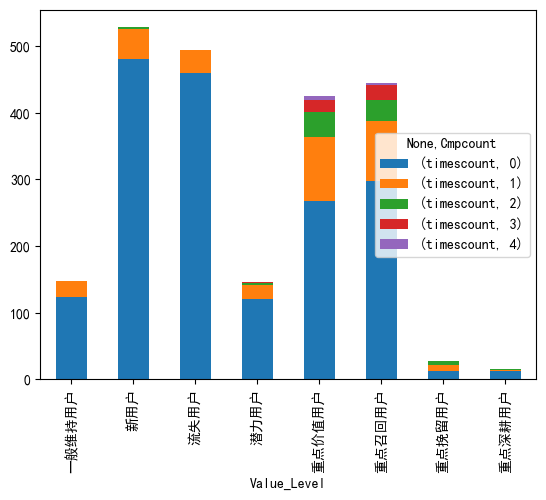

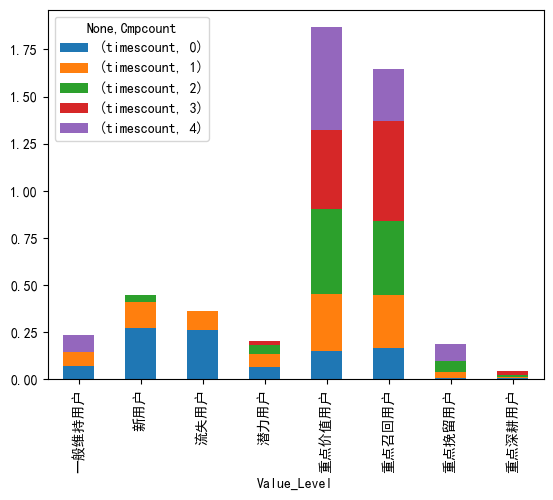

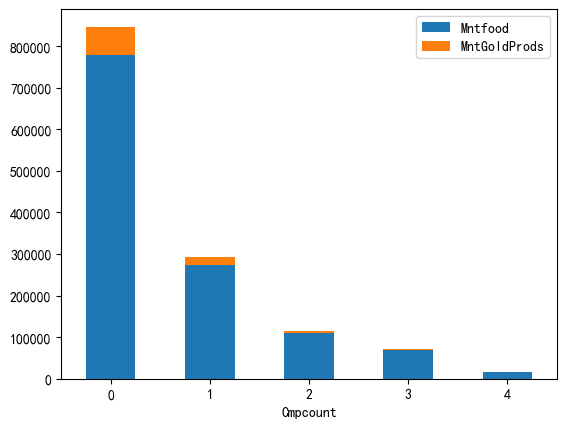

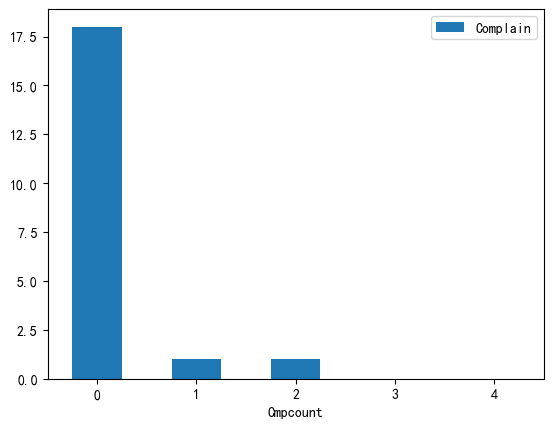

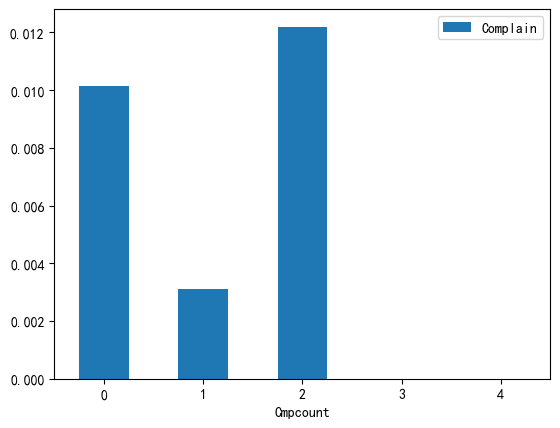

In [104]:
d_cmp = df[[
    'Cmpcount', 'Mntfood', 'MntAll', 'MntGoldProds', 'Income',
    'timescount','Complain','reduct'
]].groupby('Cmpcount')
print(df['Cmpcount'].max())
d_cmp_sum = d_cmp.sum()
d_cmp_mean = d_cmp.mean()
plt.pie(d_cmp_sum['timescount'],
        explode=[0.01, 0.01, 0.01, 0.01, 0.01],
        labels=[
            '0',
            '1',
            '2',
            '3',
            '4',
        ],
        autopct="%1.3f%%")
plt.title('用户参与活动分布图')
plt.show()
print(d_cmp_mean['reduct'])
#得到不同价值群体中收入的分布
d_cmp_value = df[['Cmpcount','timescount','Value_Level']].groupby(['Value_Level','Cmpcount'])
d_cmp_value_sum = d_cmp_value.sum().unstack()
d_cmp_value_total = d_cmp_value_sum.sum(axis=0)
d_cmp_value_sum.fillna(value=0,inplace=True)
d_cmp_value_mean = d_cmp_value_sum / d_cmp_value_total
d_cmp_value_sum.plot(kind='bar',stacked=True)
d_cmp_value_mean.plot(kind='bar',stacked=True)
# 最终可以发现用户没有参与过活动的占比最高，说明当前市场活动对用户群体吸引力不高

# 但从人均角度来看，随着用参与活动数越少，证明活动的促销力度不足，或者说其没有服务到花销最大的部分客户。
d_cmp_sum[['Mntfood', 'MntGoldProds']].plot(kind='bar', stacked=True, rot=0)

# 从投诉的角度来说，用户参与活动数越多，抱怨次数越少，说明活动有利于消除用户对市场的负面评价
# d_mar_sum[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp1','AcceptedCmp2','AcceptedCmp5','Response','Complain']].plot(kind='bar')
d_cmp_sum[['Complain']].plot(kind='bar', stacked=True, rot=0)
# d_mar_mean[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp1','AcceptedCmp2','AcceptedCmp5','Response','Complain']].plot(kind='bar')
d_cmp_mean[['Complain']].plot(kind='bar', stacked=True, rot=0)